In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

KeysView(NpzFile '/Users/osama/GP-2025-Strain/Code/Wave/displaced_images/displaced_images.npz' with keys: arr_0, arr_1, arr_2, arr_3, arr_4...)


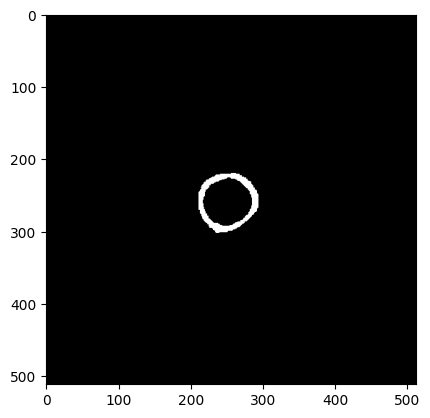

In [3]:
displacement_masks = np.load('/Users/osama/GP-2025-Strain/Code/Wave/displaced_images/displaced_images.npz')
print(displacement_masks.keys())
# get the displacement mask
i=29
displacement_mask = displacement_masks[f'arr_{i}']
displacement_mask = displacement_mask.astype(np.float64)
# displacement_mask_show = np.where(displacement_mask > 0, 255, 0)
#plot the displacement mask
plt.imshow(displacement_mask)
plt.show()

In [5]:
for key in displacement_masks.keys():
    print(key)

arr_0
arr_1
arr_2
arr_3
arr_4
arr_5
arr_6
arr_7
arr_8
arr_9
arr_10
arr_11
arr_12
arr_13
arr_14
arr_15
arr_16
arr_17
arr_18
arr_19
arr_20
arr_21
arr_22
arr_23
arr_24
arr_25
arr_26
arr_27
arr_28
arr_29
arr_30


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


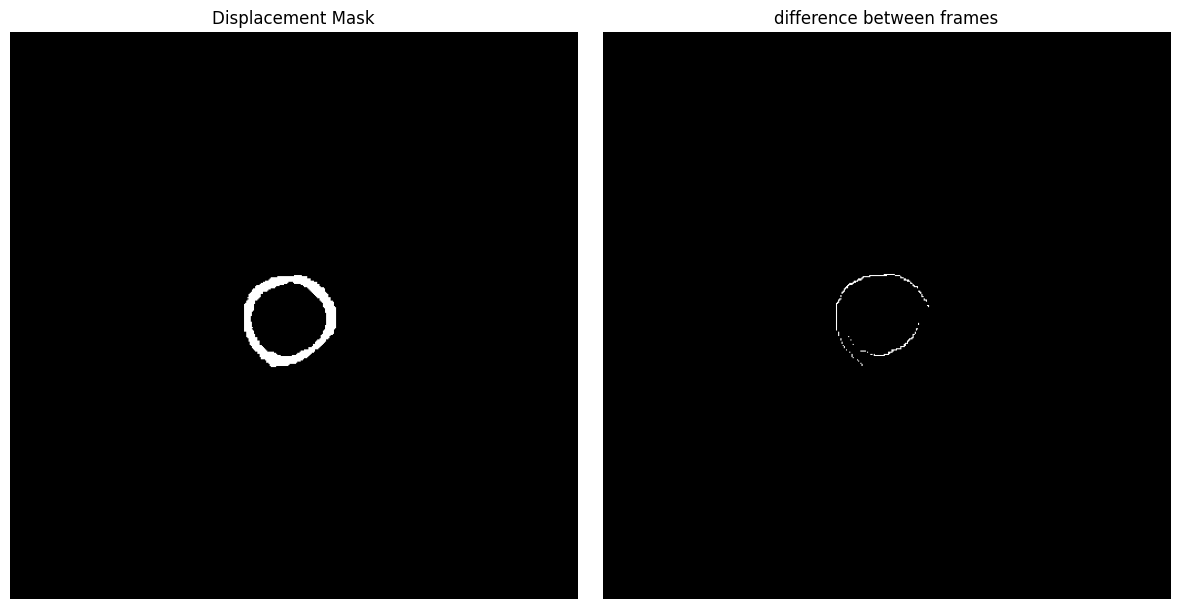

In [9]:
displacement_mask1 = displacement_masks[f'arr_{29}']
displacement_mask2 = displacement_masks[f'arr_{30}']
displacement_mask1 = displacement_mask1.astype(np.float64)
displacement_mask2 = displacement_mask2.astype(np.float64)
# plt.imshow(dilated_image)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original displacement mask
axes[0].imshow(displacement_mask1, cmap='gray')
axes[0].set_title("Displacement Mask")
axes[0].axis('off')

# Dilated mask
axes[1].imshow(displacement_mask2 - displacement_mask1, cmap='gray')
axes[1].set_title("difference between frames")
axes[1].axis('off')

plt.tight_layout()
plt.show()

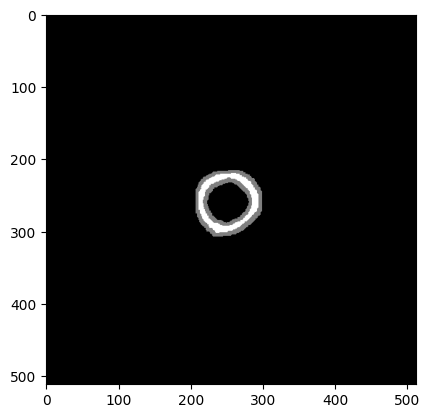

In [ ]:
# Define a kernel for dilation
kernel = np.ones((10, 10), np.float64)  # 3x3 square kernel
# Perform dilation
dilated_image = cv2.dilate(displacement_mask, kernel)

# Identify the newly added pixels
added_region = (dilated_image - displacement_mask).astype(np.float32)

# Update the dilated image: new pixels get value 0.9
dilated_image = displacement_mask + added_region * 0.5

dilated_image*255
plt.imshow(dilated_image)

In [ ]:
print(np.unique(dilated_image))

[0.  0.5 1. ]


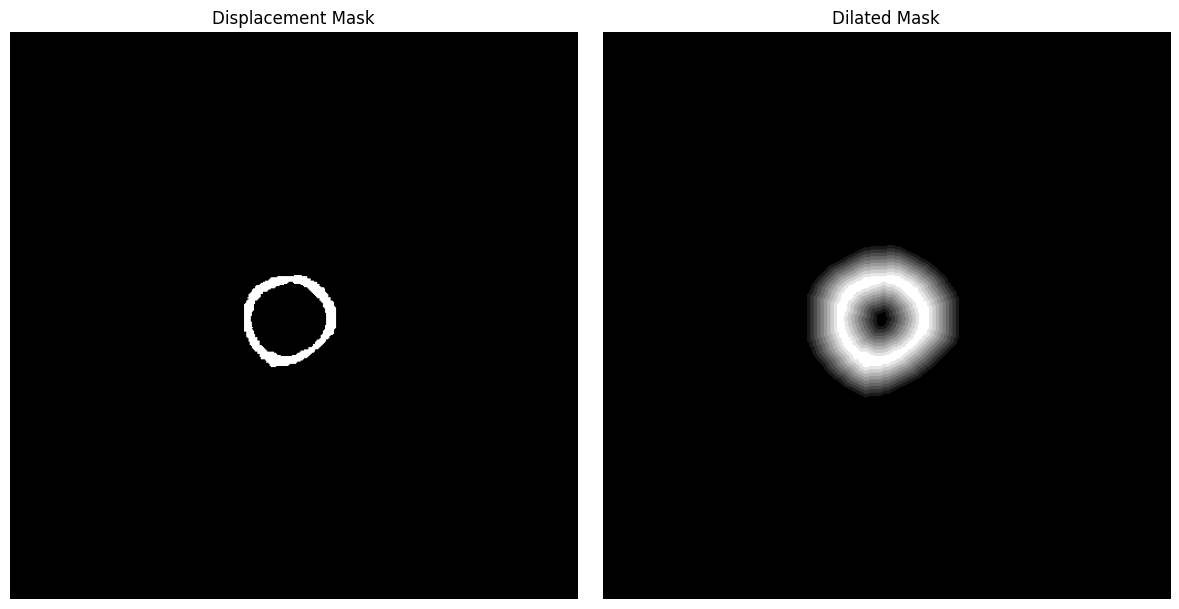

In [ ]:
# Define a kernel for dilation
# kernel = np.ones((3, 3), np.float64)  # 3x3 square kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))


value = 0.9
dilated_image = displacement_mask
process_image = displacement_mask
for i in range(10):
    # Perform dilation
    # dilated_image_new = cv2.dilate(dilated_image, kernel)
    old_process_image = process_image
    process_image = cv2.dilate(process_image, kernel)

    # Identify the newly added pixels
    added_region = (process_image - old_process_image).astype(np.float64)

    # Update the dilated image
    dilated_image = dilated_image + added_region * value
    value -= 0.1

# plt.imshow(dilated_image)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original displacement mask
axes[0].imshow(displacement_mask, cmap='gray')
axes[0].set_title("Displacement Mask")
axes[0].axis('off')

# Dilated mask
axes[1].imshow(dilated_image, cmap='gray')
axes[1].set_title("Dilated Mask")
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print(np.unique(dilated_image))

[0.00000000e+00 1.38777878e-16 1.00000000e-01 2.00000000e-01
 3.00000000e-01 4.00000000e-01 5.00000000e-01 6.00000000e-01
 7.00000000e-01 8.00000000e-01 9.00000000e-01 1.00000000e+00]


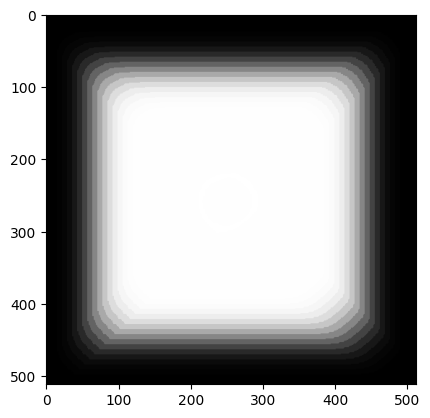

In [ ]:
# Define a kernel for dilation
kernel = np.ones((15, 15), np.float64)  # 3x3 square kernel


value = 0.9
dilated_image = displacement_mask
while(value>=0):
    # Perform dilation
    dilated_image_new = cv2.dilate(dilated_image, kernel)

    # Identify the newly added pixels
    added_region = (dilated_image_new - dilated_image).astype(np.float64)

    # Update the dilated image
    dilated_image = dilated_image + added_region * value
    value -= 0.02

plt.imshow(dilated_image)

In [ ]:
print(np.unique(dilated_image))

[1.29001922e-05 6.16293004e-05 2.55515912e-04 9.25189227e-04
 2.94221280e-03 8.26017035e-03 2.05724593e-02 4.56694786e-02
 9.08036604e-02 1.62533626e-01 2.63397116e-01 3.88987768e-01
 5.27520711e-01 6.62895124e-01 7.80048481e-01 8.69766675e-01
 9.30496749e-01 9.66772559e-01 9.85853326e-01 9.94667285e-01
 9.98230921e-01 9.99486905e-01 9.99870849e-01 9.99972027e-01
 9.99994840e-01 9.99999199e-01 9.99999897e-01 9.99999989e-01
 9.99999999e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


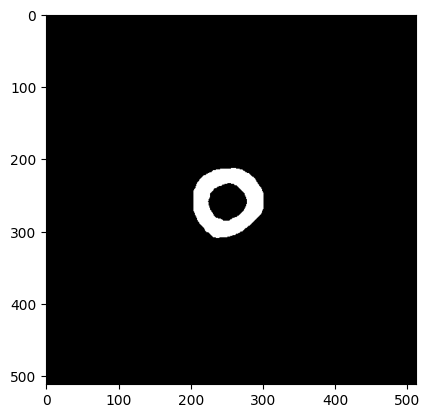

In [ ]:
dilate_image = displacement_mask

# Define a circular kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

# Dilate outward
dilated = cv2.dilate(dilate_image, kernel, iterations=1)

# Mask to preserve the hollow part
hollow_part = cv2.erode(dilate_image, kernel, iterations=1)





outward_dilated = cv2.subtract(dilated, hollow_part)

# Visualize the result
plt.imshow(outward_dilated, cmap='gray')
plt.show()

In [ ]:
#Check dilation function
dilated_masks = np.load('/Users/osama/GP-2025-Strain/Code/Wave/dilated_masks/dilated_masks.npz')

dilated_mask = dilated_masks[f'arr_{32}']

plt.imshow(dilated_mask)

KeyError: 'arr_32 is not a file in the archive'

In [ ]:
print(np.unique(dilated_mask))

[0.00000000e+00 1.38777878e-16 1.00000000e-01 2.00000000e-01
 3.00000000e-01 4.00000000e-01 5.00000000e-01 6.00000000e-01
 7.00000000e-01 8.00000000e-01 9.00000000e-01 1.00000000e+00]
